##Applied Machine Learning Homework 1

### Question 1: Density Plot (20 points)
The exercise will work on the Australia Fire dataset, which can be located here: https://www.kaggle.com/datasets/carlosparadis/fires-from-space-australia-and-new-zeland
We will work with fire nrt V1 96617.csv which is described here: https://www.earthdata.nasa.gov/
learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data
Remember that during the lecture, we emphasized several times that plotting your data is very important.
Here plot the longitude vs latitude several ways within a single figure (each in its own axes):

•Using the matplotlib defaults. (matplotlib is a python package we used in our sample code).

•Adjusting alpha and marker size to compensate for overplotting.

•Using a hexbin plot.

•Subsampling the dataset.


For each but the first one, ensure that all the plotting area is used in a reasonable way and that as much
information as possible is conveyed; this is somewhat subjective and there is no one right answer.
Answer this question based on what you find: in what areas are most of the anomalies (measurements)
located?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import pandas_profiling as pp

In [4]:
from google.colab import files
uploaded = files.upload()

Saving fire_nrt_V1_96617.csv to fire_nrt_V1_96617.csv


In [5]:
from re import X
df = pd.read_csv("fire_nrt_V1_96617.csv", sep=",")
#print(data)
# Taking x as longitude
x = df.iloc[:,1:2].values
# Taking y as latitude
y = df.iloc[:,0:1].values

df.columns
# print(x)
# print(y)


Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight'],
      dtype='object')

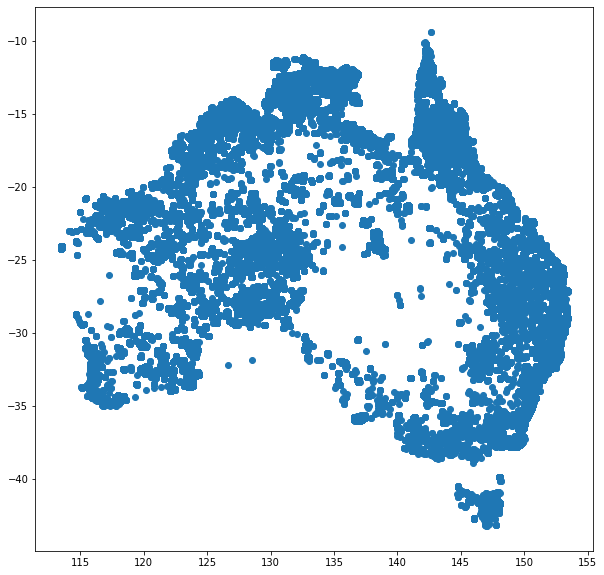

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.show()

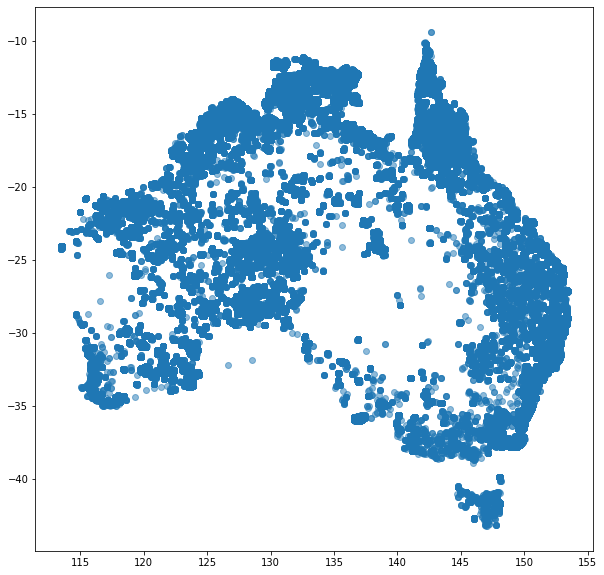

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,10))
plt.scatter(x,y,alpha=0.5,marker='o')
plt.show()

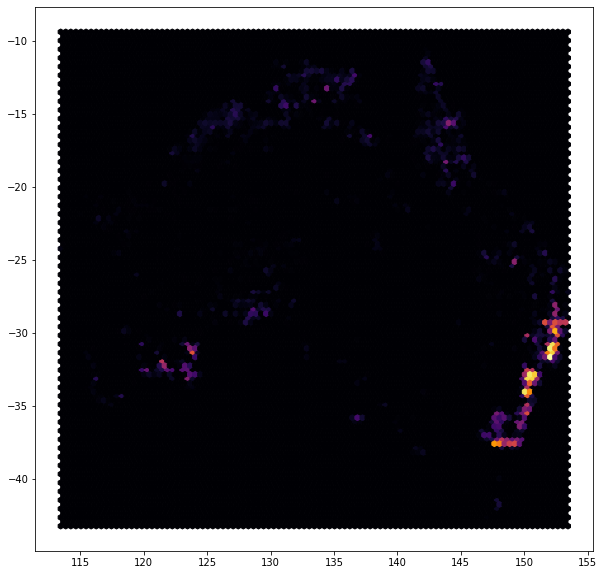

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,10))
plt.hexbin(x,y,gridsize=100, cmap="inferno")
plt.show()

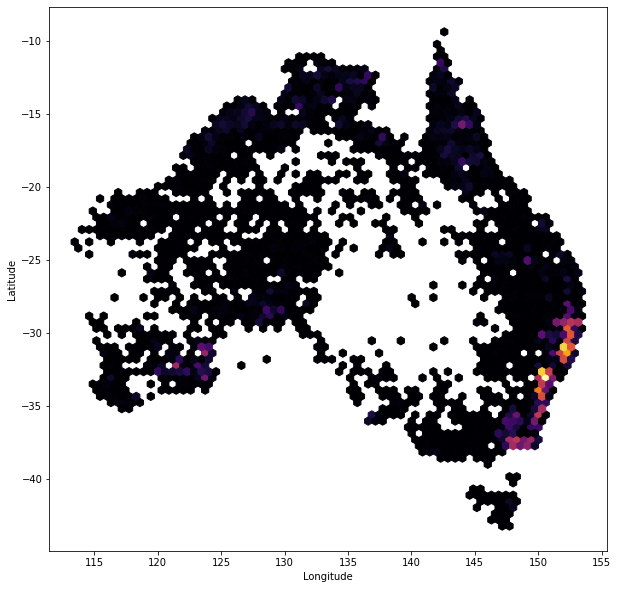

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,10))
plt.hexbin(x,y,gridsize=70, cmap="inferno",mincnt=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

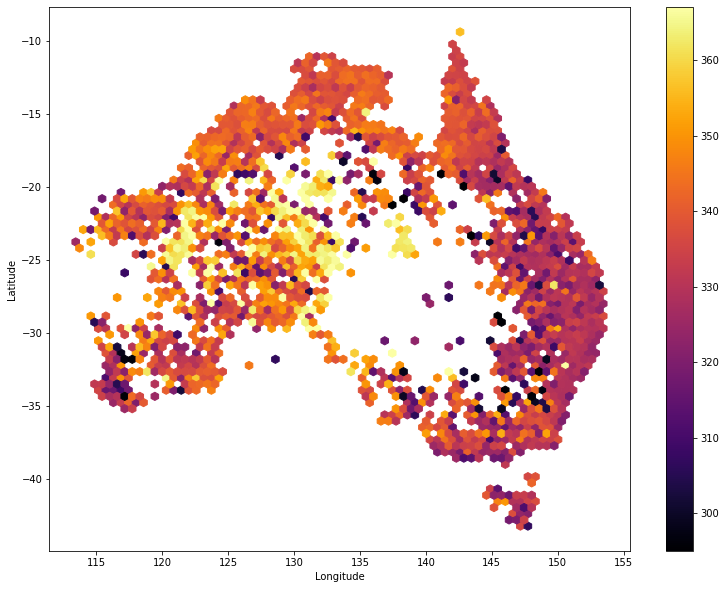

In [10]:
plt.figure(figsize=(13,10))
color_map = plt.hexbin('longitude','latitude', gridsize = 70,  cmap="inferno",C = df['bright_ti4'],data = df)
plt.colorbar(color_map)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
#Sub Sampling by 50%
df_sub=df.sample(frac=0.5, replace=True, random_state=1)
x1 = df_sub.iloc[:,1:2].values
y1 = df_sub.iloc[:,0:1].values


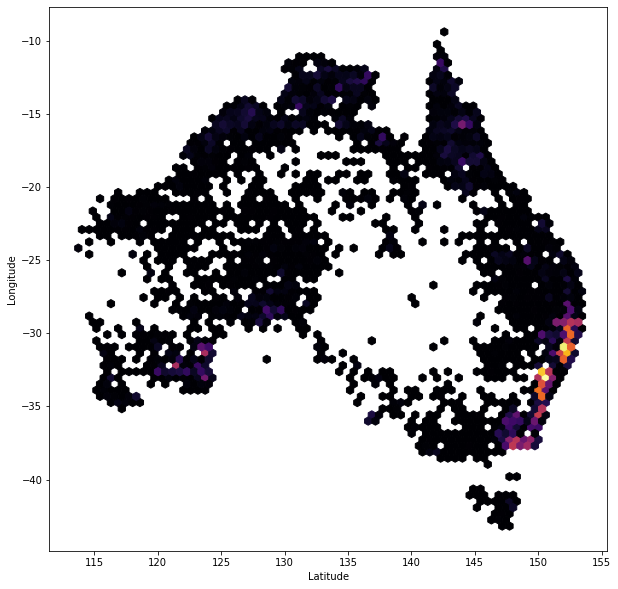

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,10))
plt.hexbin(x1,y1,gridsize=70, cmap="inferno",mincnt=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Question 2: Visualizing class membership (20 points)
Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). Let’s
assume we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.

•Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for
those points with brightness saturated and a separate for those who are not (within the same figure on
separate axes). You can pick any of the methods from the question above that you find most suitable.
Can you spot differences in the distributions?

•Plot both groups in the same axes with different colors. Try changing the order of plotting the two
classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to
include a legend. How does that impact the result?

•Can you find a better way to compare the two distributions?

In [13]:
import pandas as pd
fire_df = pd.read_csv('/content/fire_nrt_V1_96617.csv')

In [14]:
fire_df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [15]:
for x in fire_df.bright_ti4:
  if int(x)<240 : print(x)

208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
233.6
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
235.2
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.0
208.

(array([6.20000e+02, 4.00000e+00, 1.60000e+01, 5.10000e+01, 1.15000e+02,
        7.84870e+04, 2.32192e+05, 1.44715e+05, 2.61084e+05, 2.38973e+05]),
 array([208. , 223.9, 239.8, 255.7, 271.6, 287.5, 303.4, 319.3, 335.2,
        351.1, 367. ]),
 <a list of 10 Patch objects>)

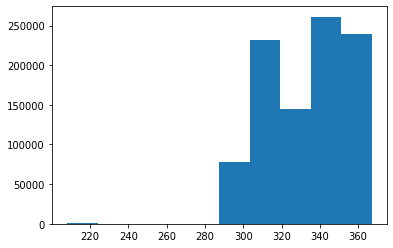

In [16]:
import matplotlib.pyplot as plt
plt.hist(fire_df.bright_ti4)

In [17]:
fire_df.bright_ti4[1]

336.2

In [18]:
unsaturated_lat=[]
unsaturated_long=[]
saturated_lat=[]
saturated_long=[]
saturated_brightness=[]
unsaturated_brightness=[]

for x in range(len(fire_df.bright_ti4)):
  if int(fire_df.bright_ti4[x])<240 : unsaturated_lat.append(fire_df.latitude[x]), unsaturated_long.append(fire_df.longitude[x]);unsaturated_brightness.append(fire_df.bright_ti4[x])

for x in range(len(fire_df.bright_ti4)):
  if int(fire_df.bright_ti4[x])>240 : saturated_lat.append(fire_df.latitude[x]), saturated_long.append(fire_df.longitude[x]);saturated_brightness.append(fire_df.bright_ti4[x])



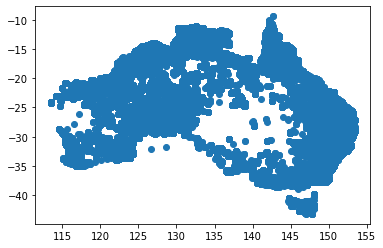

In [19]:
ax= plt.scatter(saturated_long,saturated_lat)

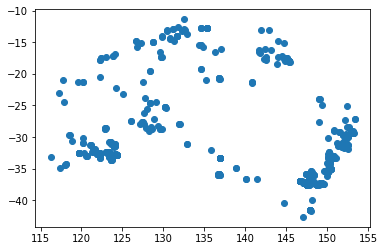

In [20]:
ax=plt.scatter(unsaturated_long,unsaturated_lat)
#saturated_lat = [x for x in fire_df.latitude if x not in unsaturated_lat]
#saturated_long = [x for x in fire_df.longitude if x not in unsaturated_long]
#ax[1].plot(saturated_long,saturated_lat)
#ax[1]= plt.scatter(saturated_long,saturated_lat)

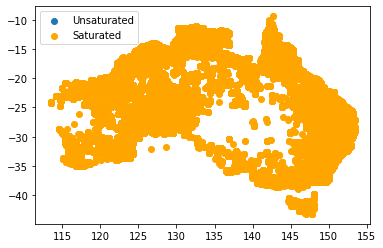

In [21]:
fig, ax = plt.subplots()
ax.scatter(unsaturated_long,unsaturated_lat,label='Unsaturated')
#saturated_lat = [x for x in fire_df.latitude if x not in unsaturated_lat]
#saturated_long = [x for x in fire_df.longitude if x not in unsaturated_long]
ax.scatter(saturated_long,saturated_lat,c='orange',label='Saturated')
ax.legend()

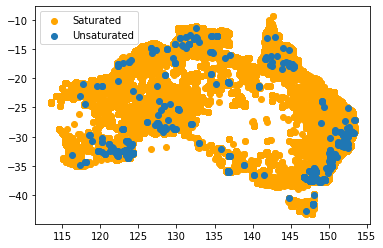

In [22]:
fig, ax = plt.subplots()
ax.scatter(saturated_long,saturated_lat,c='orange',label='Saturated')
ax.scatter(unsaturated_long,unsaturated_lat,label='Unsaturated')
ax.legend()

Fires with unsaturated brightness are near the coast whereas the fires with saturated fires are more evenly spread out.

In [23]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 16.7 MB 48.9 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 


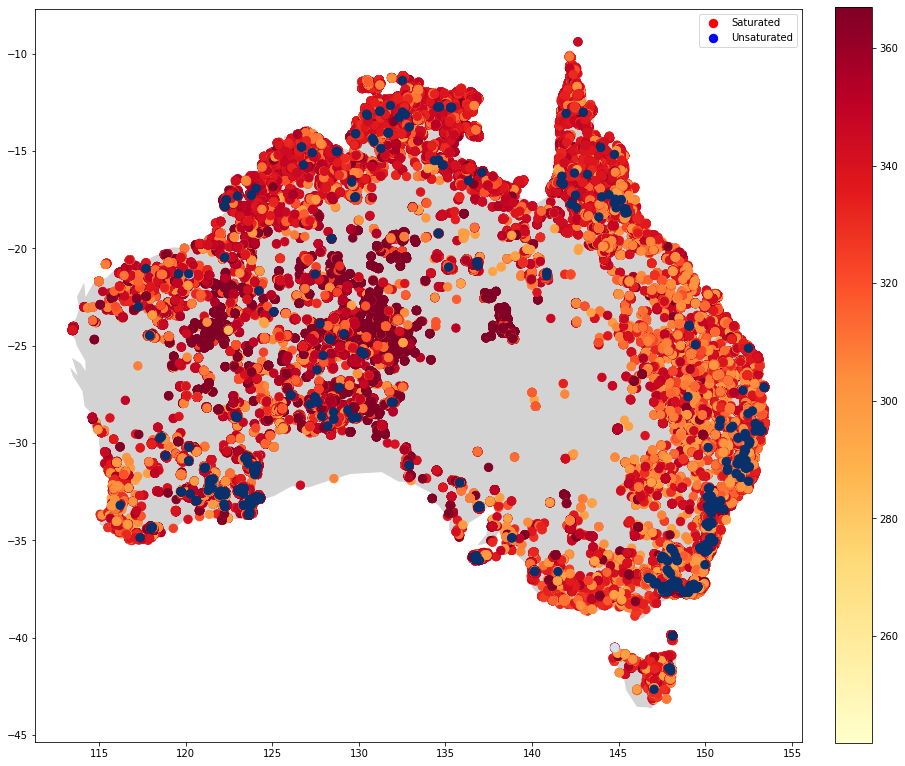

In [24]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(15,20))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey",ax=ax)
sat=ax.scatter(saturated_long,saturated_lat,label='Saturated',c=saturated_brightness, cmap="YlOrRd",s=70,vmin=min(saturated_brightness), vmax=max(saturated_brightness))
ax.scatter(unsaturated_long,unsaturated_lat,label='Unsaturated',c=unsaturated_brightness,cmap="Blues_r",s=70)
plt.colorbar(sat,fraction=0.044, pad=0.04)
ax.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('blue')

###Question 3: Regression Sydney Dataset (30 points)
You can load the Sydney dataset from https://www.kaggle.com/shree1992/housedata where you can
also find a description. The goal is to predict the ’price’ column. For this task, you can ignore the date.

•Determine which features are continuous vs. categorical. Drop rows without a valid sales price.

•Visualize the univariate distribution of each continuous variable, and the distribution of the target.
Do you notice anything? Is there something that might require special treatment?

•Visualize the dependency of the target on each continuous feature (2d scatter plot).

•Split the data in training and testing set. Use ColumnTransformer to encode categorical variables.
Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and
Elasticnet (although we haven’t talked about these methods yet, but you can easily find references
online and you can use provided functions by Scikit-learn or other packages directly) using cross-
validation with the default parameters. Dose scaling the data with StandardScaler help? Use the
preprocessing that works best going forward.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [26]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [27]:
from re import X
df = pd.read_csv("data.csv", sep=",")
#print(data)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [28]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

•Determine which features are continuous vs. categorical. Drop rows without a valid sales price.

In [29]:
df = df.drop(df[df['price'] < 10].index, inplace = True)

In [30]:
#Q3

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import pandas_profiling as pp
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [32]:
from re import X
df = pd.read_csv("data.csv", sep=",")
# The continous variables in the given dataset are price, bedrooms, bathrooms,floors, waterfront, view, condition, sqft_above,sqft_basement,yr_built 
#and yr_renovated whereas the categorical columns are street,city ,statezip and country.





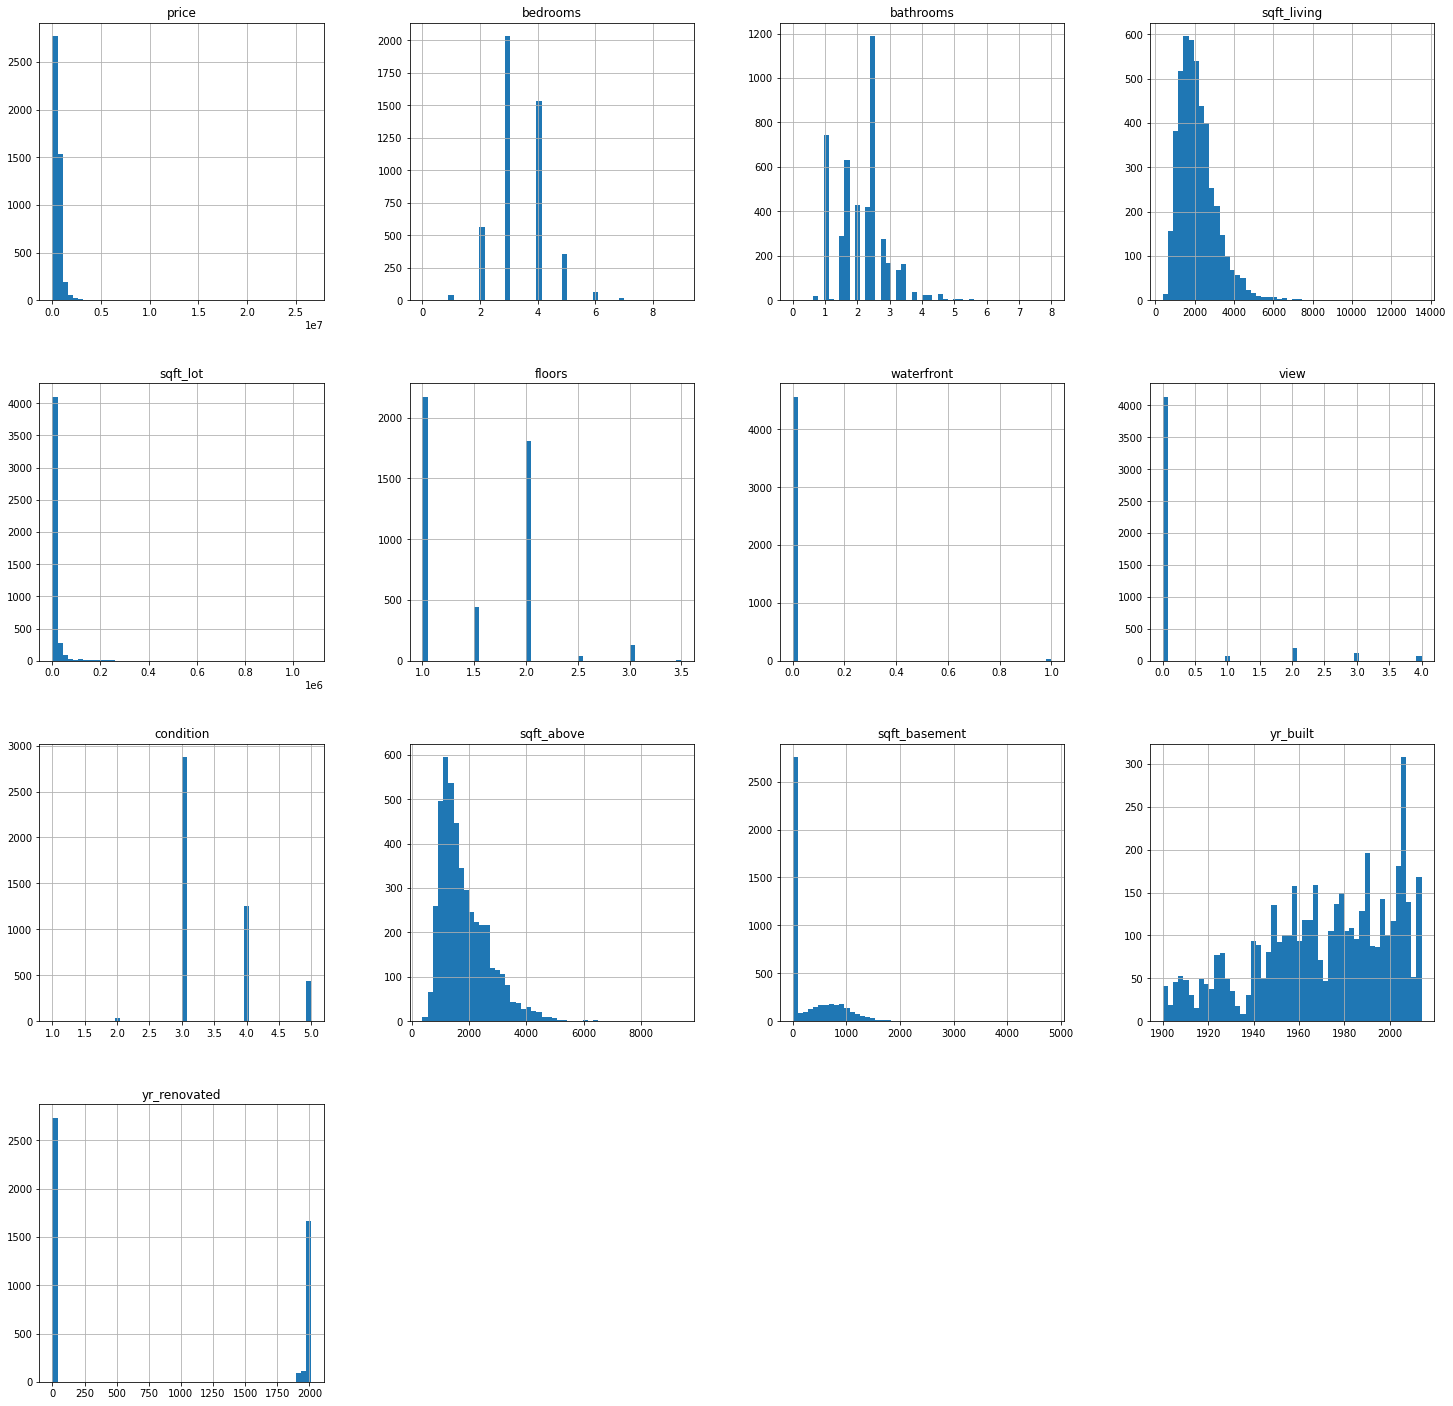

In [33]:
%matplotlib inline
import matplotlib.pyplot as plot
df.hist(bins=50, figsize=(25,25))
#save_fig("attribute_histogram_plots")
plot.show()

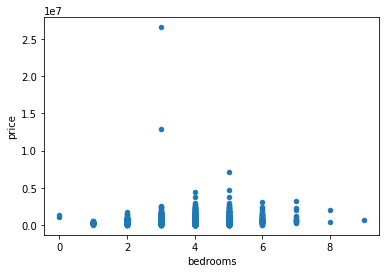

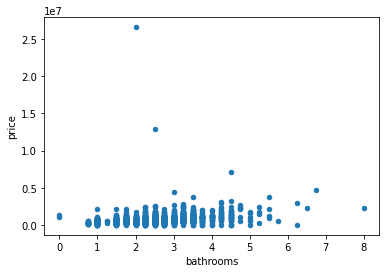

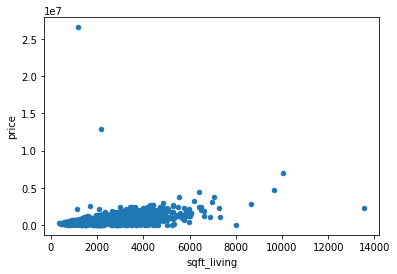

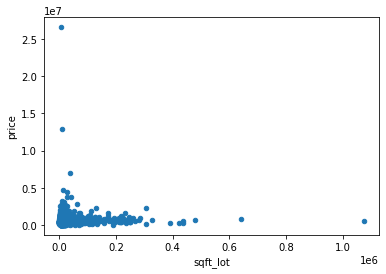

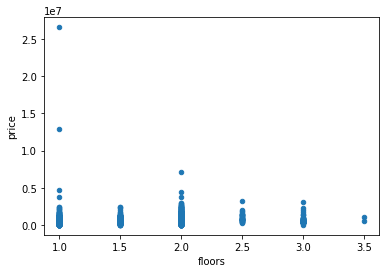

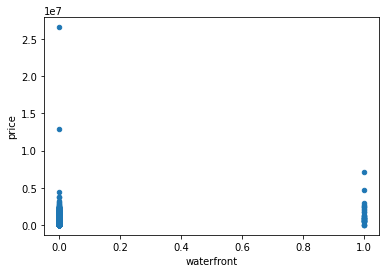

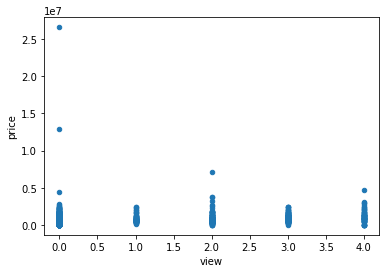

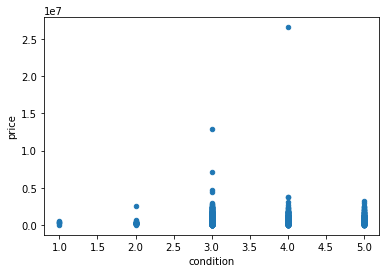

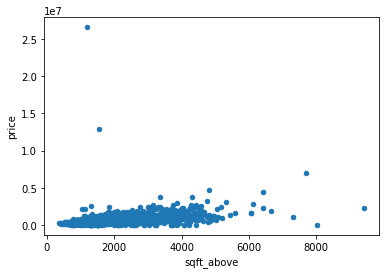

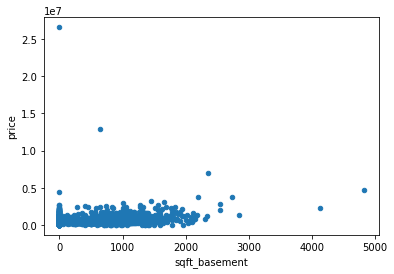

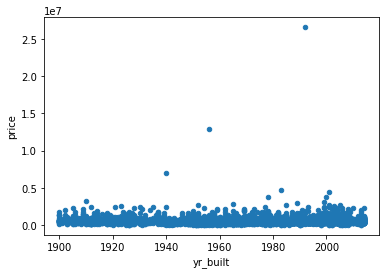

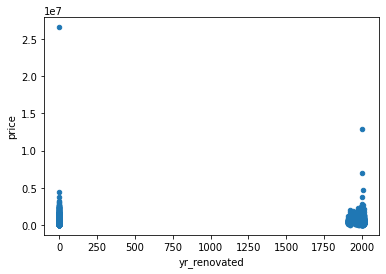

In [34]:
df.plot.scatter(x= 'bedrooms',y ='price')
df.plot.scatter(x= 'bathrooms',y ='price' )
df.plot.scatter(x= 'sqft_living',y ='price' )
df.plot.scatter(x= 'sqft_lot',y ='price')
df.plot.scatter(x= 'floors',y ='price')
df.plot.scatter(x= 'waterfront',y ='price')
df.plot.scatter(x='view',y ='price')
df.plot.scatter(x= 'condition',y ='price' )
df.plot.scatter(x= 'sqft_above',y ='price' )
df.plot.scatter(x= 'sqft_basement',y ='price' )
df.plot.scatter(x= 'yr_built',y ='price' )
df.plot.scatter(x= 'yr_renovated',y ='price')


In [35]:
categorical=df.select_dtypes(exclude=['float64','int64']).columns.tolist()


In [36]:
from sklearn.model_selection import train_test_split
y = df.iloc[:,1]
x = df.drop(['price','date'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
check = x.dtypes == object
check

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street            True
city              True
statezip          True
country           True
dtype: bool

In [38]:
# referred following link https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocessing = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), check))
m = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocessing, LinearRegression())
m.fit(X_train, y_train)
scores1 = cross_val_score(m, X_train, y_train, cv=6)
print(scores1.mean())

preprocessing = make_column_transformer(
    (StandardScaler(), ~check),
    (OneHotEncoder(handle_unknown='ignore'), check))
m = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocessing, Ridge())
m.fit(X_train, y_train)
scores2 = cross_val_score(m, X_train, y_train, cv=6)
print(scores2.mean())

preprocessing = make_column_transformer(
    (StandardScaler(), ~check),
    (OneHotEncoder(handle_unknown='ignore'), check))
m = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocessing, Lasso())
m.fit(X_train, y_train)
scores3 = cross_val_score(m, X_train, y_train, cv=6)
print(scores3.mean())



0.19559961836281367
0.5362074914827363


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2076163808347.113, tolerance: 120046311786.66505
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1782715620479.6162, tolerance: 112678760685.12796
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2143300305737.5425, tolerance: 113858046183.68901
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1932370

0.43872065235853724


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2352484040550.5527, tolerance: 107138992994.72357
  positive,


In [39]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
preprocessing = make_column_transformer(
    (StandardScaler(), ~check),
    (OneHotEncoder(handle_unknown='ignore'), check))
m2 = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocessing, Lasso(max_iter=100))
m2.fit(X_train, y_train)
scores3 = cross_val_score(m2, X_train, y_train, cv=6)
print(scores3.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3776597333111.1255, tolerance: 120046311786.66505
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3207577902449.874, tolerance: 112678760685.12796
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3230629820131.8955, tolerance: 113858046183.68901
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3138958

0.4546454215537475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3188591240456.597, tolerance: 107138992994.72357
  positive,


In [40]:
preprocessing = make_column_transformer(
    (StandardScaler(), ~check),
    (OneHotEncoder(handle_unknown='ignore'), check))
m4 = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocessing, ElasticNet())
m4.fit(X_train, y_train)
scores4 = cross_val_score(m4, X_train, y_train, cv=6)
print(scores4.mean())

0.43976688004654285


###Question 4: Classification on the ’credit-g’ dataset (30 points)
You can download the dataset with ’fetch openml(’credit-g’)’ and see its description at https://www.openml.org/d/31

•Determine which features are continuous and which ones are categorical.

•Visualize the univariate distribution of each continuous variable, and the distribution of the target.

•Split the data in training and testing set. Preprocess the data (such as treatment of categorical
variables) and evaluate and initial Logistic Regression model (directly use the provided function) with
with a training/validation split.

•Use ColumnTransformer to encode categorical variables. Evaluate Logistic Regression, Linear Support
Vector Machines and nearest neighbors (You can directly call these functions). How different are the
results? How dose scaling the continuous features with StandardScaler influence the results?

In [43]:
from sklearn.datasets import fetch_openml
data = fetch_openml('credit-g', version='active')

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


In [44]:
data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [45]:
data.categories

In [46]:
print(data.categories)

None


Visualize the univariate distribution of each continuous variable, and the distribution of the target.

In [47]:
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
dataframe['class'] = data.target

In [48]:
plt.figure(figsize=(12, 40))

<Figure size 864x2880 with 0 Axes>

<Figure size 864x2880 with 0 Axes>

Text(0.5, 0, 'Duration')

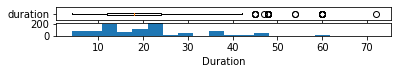

In [49]:
duration_data = dataframe['duration']
# plotting boxplot and histogram for duration
a1 = plt.subplot(14, 1, 1)
a1.boxplot(duration_data, vert=False)
a1.set_yticklabels(['duration'])

a2 = plt.subplot(14,1,2)
a2.hist(duration_data, bins=20)
a2.set_xlabel('Duration')

•Split the data in training and testing set. Preprocess the data (such as treatment of categorical variables) and evaluate and initial Logistic Regression model (directly use the provided function) with with a training/validation split.


Q4


In [50]:
import pandas as pd
import numpy as np

In [51]:
from sklearn.datasets import fetch_openml
creditg = fetch_openml('credit-g')

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


In [52]:
print(creditg)

{'data':     checking_status  duration                  credit_history  \
0                <0       6.0  critical/other existing credit   
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1

In [53]:
print(creditg.feature_names)

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


In [54]:
creditg.data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [55]:
continous=creditg.data.select_dtypes(include=['float64']).columns.tolist()
print(continous)

['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


In [56]:
categorical=creditg.data.select_dtypes(exclude=['float64']).columns.tolist()
print(categorical)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


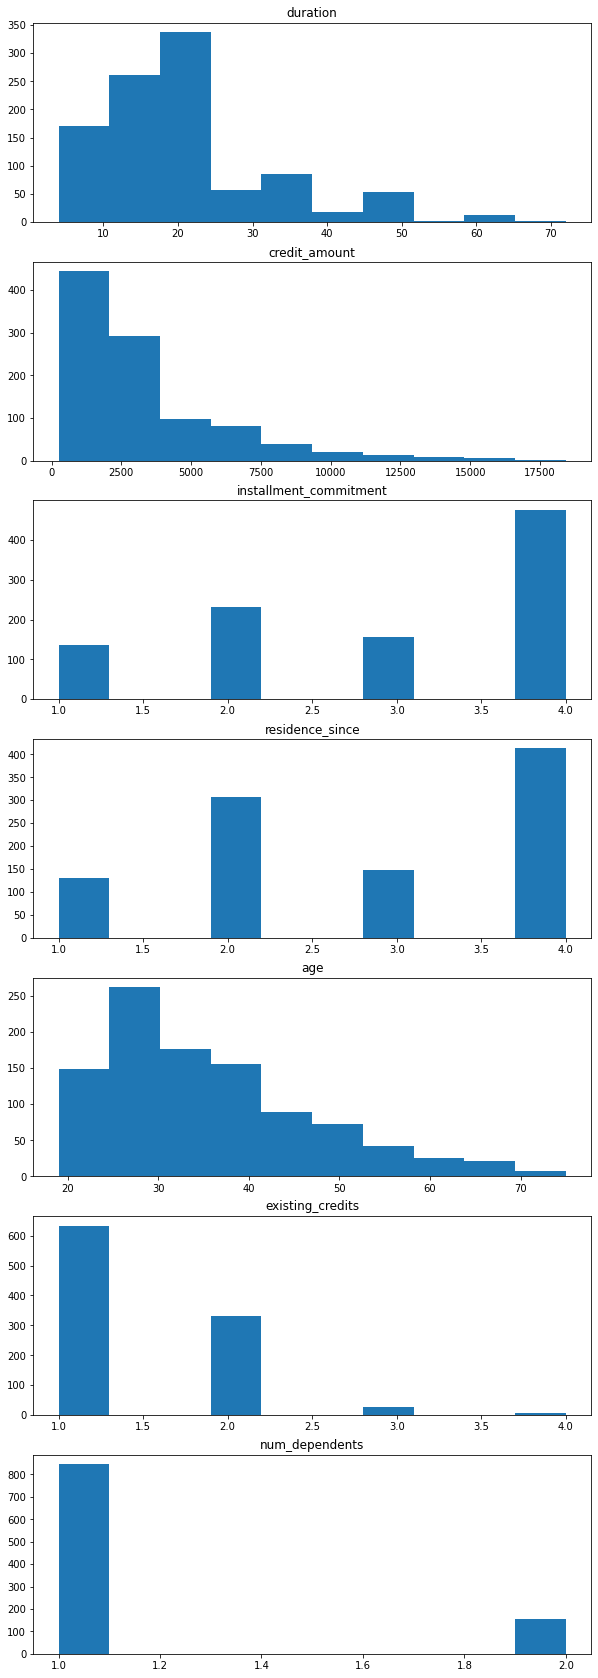

In [57]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(len(continous), figsize=(10,30))
for i,att in enumerate(continous):
    ax[i].hist(creditg.data[att])
    ax[i].set_title(str(att))

In [58]:
creditg.target

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['good', 'bad']

(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

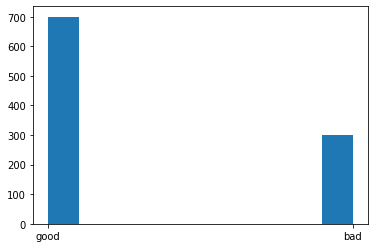

In [59]:
plt.hist(creditg.target)

In [60]:
pd.get_dummies(creditg.data.checking_status)

,<0,0<=X<200,>=200,no checking
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,0,1
996,1,0,0,0
997,0,0,0,1
998,1,0,0,0


In [61]:
from sklearn import preprocessing

preprocessed_data= creditg.data

for att in categorical:
  categorical_features = preprocessing.LabelEncoder().fit_transform(preprocessed_data[att])
  preprocessed_data[att]=categorical_features
print(preprocessed_data)

     checking_status  duration  credit_history  purpose  credit_amount  \
0                  1       6.0               1        6         1169.0   
1                  0      48.0               3        6         5951.0   
2                  3      12.0               1        2         2096.0   
3                  1      42.0               3        3         7882.0   
4                  1      24.0               2        4         4870.0   
..               ...       ...             ...      ...            ...   
995                3      12.0               3        3         1736.0   
996                1      30.0               3        9         3857.0   
997                3      12.0               3        6          804.0   
998                1      45.0               3        6         1845.0   
999                0      45.0               1        9         4576.0   

     savings_status  employment  installment_commitment  personal_status  \
0                 4           3    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [62]:
preprocessed_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,4.0,3,67.0,1,1,2.0,1,1.0,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,2.0,3,22.0,1,1,1.0,1,1.0,0,1
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,3.0,3,49.0,1,1,1.0,3,2.0,0,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,4.0,1,45.0,1,0,1.0,1,2.0,0,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,4.0,2,53.0,1,0,2.0,1,2.0,0,1


In [63]:
y= creditg.target
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['good', 'bad']

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_remaining, y_train, y_remaining = train_test_split(preprocessed_data, y,test_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_remaining,y_remaining, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(200, 20)
(200,)
(400, 20)
(400,)
(400, 20)
(400,)


In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
model.predict(X_valid)
model.score(X_valid, y_valid)

0.705

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

new_data=creditg.data
preprocess = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical))
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical)], remainder='passthrough')
column_transformed_data = np.array(columnTransformer.fit_transform(new_data), dtype = str)

In [68]:
column_transformed_data[:5]

array([['0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
        '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0',
        '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0',
        '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0',
        '6.0', '1169.0', '4.0', '4.0', '67.0', '2.0', '1.0'],
       ['1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0',
        '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0',
        '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0',
        '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0',
        '48.0', '5951.0', '2.0', '2.0', '22.0', '1.0', '1.0'],
       ['0.0', '0.0', '

In [69]:
from sklearn.model_selection import train_test_split

X_train_new, X_remaining_new, y_train_new, y_remaining_new = train_test_split(new_data, y,test_size=0.8)

X_valid_new, X_test_new, y_valid_new, y_test_new = train_test_split(X_remaining,y_remaining, test_size=0.5)

print(X_train_new.shape), print(y_train_new.shape)
print(X_valid_new.shape), print(y_valid_new.shape)
print(X_test_new.shape), print(y_test_new.shape)

(200, 20)
(200,)
(400, 20)
(400,)
(400, 20)
(400,)


(None, None)

In [70]:
from sklearn.pipeline import make_pipeline
model = LogisticRegression(max_iter=1000)
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
ypredict = pipeline.predict(X_valid_new)
print(ypredict)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1]


In [71]:
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import  StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

score: 0.660


In [72]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=10000)
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
ypredict = pipeline.predict(X_valid_new)
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

score: 0.605


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [73]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
ypredict = pipeline.predict(X_valid_new)
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

score: 0.655


Scaling continous variables

In [74]:
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(max_iter=10000)
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical),('scaler',StandardScaler(), continous)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
prediction = pipeline.predict(X_valid_new)
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

score: 0.673


In [75]:
model = LinearSVC(max_iter=10000)

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical),('scaler',StandardScaler(), continous)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
prediction = pipeline.predict(X_valid_new)
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

score: 0.610


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [76]:
model = KNeighborsClassifier()

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical),('scaler',StandardScaler(), continous)])
pipeline = make_pipeline(transformer,model)
pipeline.fit(X_train_new, y_train_new)
prediction = pipeline.predict(X_valid_new)
skf = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_valid_new, y_valid_new,cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores)))

score: 0.677


Scaling has improved the accuracy. Some of the models also required max iterations to be increased before scaling the attributes.